 # Rugby - Are the stereotypes still true ?

by MASSIP Jean-Manuel

![capplayer](captainplayer.jpg)

## Table of Contents

- Introduction
- Business Understanding
- Data Understanding
- Prepare Data
- Data Modeling
- Evaluate the Results
- Conclusions


## Introduction

For this project I choose to analyse a dataset on rugby sport using the CRISP-DM Process.

You can find the associated article on the Medium platform here : https://medium.com/@jeanmanuelmassip/truth-or-myths-flanker-best-tackler-in-the-game-3ef09035136e



## Business Understanding
Historically, we said that "Everybody can play rugby !". This game, with this very speficifc static phases allow a lot of different body-shapes to play together.

Since the 2000's, Rugby organisations and committees have changed from amateur to professional level. In the same time, the physical aspects of the top players (now call professional players) have also changed : They are stronger, faster, resistant … 

In the same time, a lot of rules have changed and the effective time of each game have doubled.

***In a nutshell :  The game changed.***

The trend is to have players strong and fast on every position on the field and each player need to perform in all aspect of the game : Passing, Tackling, reading the play...


My will is to test if the "ideas" that we have (as rugby fan) in our collective imaginary are still true.


### Questions  :  
Or it our case : Stereotype to test : 

On physical aspects :
- "Forward" players are bigger than than "Back" players.
- "Props" have the biggest BMI (ratio height/weight).
- "Locks" are taller.

On defensive aspects :
- "Forward" players tackle more than "Back" players. 
- "Flankers" are the best tackler in the field. Locks are second".

On offensive aspects :
- "Back" players score more tries than "Forward" players.
- "Wingers" are the best scorer in the game.

On Kicks aspect :
- "Back" players use more their feet than "Forward" players.
- "Fly-half" is the position where we kick more.



### "Business" prerequisites  :
 
We can't here (in this Jupyter Notebook) explain what are all the rugby rules and goals of this game.
Nevertheless, you can find some explanations to help you to understand in the projet here-after. We also provide some links to learn if you need. Therefore, if you know the Rugby, feel free to skip this part.

#### Rugby
A sport where players can hold or kick an ovoid ball. The ball cannot be handled forwards and points are scored by touching the ball to the ground in the area past their opponent’s territory or kicking the ball between goalposts and over a crossbar.

Rugby is a team sport that requires all 15 players to participate in both offense and defense. Thus, all rugby players must learn the basic skills of catching and passing the ball, running with the ball, tackling, and rucking.

For more information, please read https://www.rugbyexplained.com/.


#### Rugby Positions
![pos](https://whatisrugby.com/wp-content/uploads/2018/11/rugby-positions.jpg)

For more information, please read https://whatisrugby.com/rugby-101/rugby-positions/.

#### Tackle
The best way to stop the ball carrier is to get hold of them and take them to the ground.
For more information, please read https://www.rugbyhow.com/rugby-tackle.html, https://rugbydome.com/legal-and-illegal-tackling-in-rugby/.

#### Six Nations Rugby competition

The Six Nations Rugby competition has been played since 2000 between Ireland, England, Scotland, Wales, France, and Italy. Every team plays each other once. It is the annual International European Cup.
For more information, please read https://en.wikipedia.org/wiki/Six_Nations_Championship.
    

## Data Understanding

The dataset used is provided on Kaggle (link in the resources section).
It is an Excelfile which contains 12 tables but only one in useful for our investigation, the one with all players statistics. The others are on teams and records.

For more convinience, we have extract the players statisitcs table and store it in in a Excelfile named "players-stats-input.xlsx".

### Import
To get started, let's import our libraries :


In [15]:
# import the necessary libraries
import pandas as pd
from datetime import datetime, date
from dython.nominal import associations
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [16]:
# read in the dataset
df = pd.read_excel("players-stats-input.xlsx")

In [17]:
# check if the import is working
df.head()

,Country,Player,Forward Or Back,Years Active in Six Nations,Years Played in Six Nations,First Year in Six Nations,Most recent Year Six Nations,Six Nations Matches,Six Nations Start,Six Nations Sub,...,2019 Turnovers Won,2019 Turnovers Conceded,2019 Handling Errors,2019 Penalties Conceded,2019 Kicks from hand,2019 Kicks Caught,2019 Successful Lineout Takes,2019 Stolen Lineouts,2019 Yellow Cards,2019 Red Cards
0,France,Dorian Aldegheri,Forward,2019-2019,1.0,2019.0,2019.0,4.0,0.0,4.0,...,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
1,France,Cyril Baille,Forward,2017-2017,1.0,2017.0,2017.0,5.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Demba Bamba,Forward,2019-2019,1.0,2019.0,2019.0,5.0,4.0,1.0,...,0.0,5.0,4.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0
3,France,Camille Chat,Forward,2016-2019,4.0,2016.0,2019.0,9.0,0.0,9.0,...,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
4,France,Anthony Etrillard,Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#output the shape of the data frame
df.shape

(224, 70)

In [19]:
df.columns

Index(['Country', 'Player', 'Forward Or Back', 'Years Active in Six Nations',
       'Years Played in Six Nations', 'First Year in Six Nations',
       'Most recent Year Six Nations', 'Six Nations Matches',
       'Six Nations Start', 'Six Nations Sub', 'Six Nations Pts',
       'Six Nations Tries', 'Six Nations Conv', 'Six Nations Penalties',
       'Six Nations Drop', 'Six Nations Won', 'Six Nations Lost',
       'Six Nations Draw', '% wins', 'Position Detailed', 'Height In Metres',
       'Weight In KG', 'Born', 'Played in Six Nations Before', 'RPI Score',
       'Club', 'Influence', 'Attacking', 'Territorial Kick Meters',
       'Try Saver', 'Scrum Score', 'Lineout Score', 'Jackal', 'LineOut Take',
       'LineOut Steal', 'Tackle Turnover', 'Snaffle', 'Pass Complete', 'Mark',
       'Defensive Catch', 'Goal Success', 'Break', '2019 Metres Gained',
       '2019 Carries', '2019 Six Nations Metres Per Carry',
       '2019 Minutes Played', '2019 Points', '2019 Tries ', '2019 Try assist

## Prepare the Data

Hereafter, you can find the list of issues.
- Important Number of columns -> Extract the usefull ones.
- Rename the columns to be more readable.
- Filter only the player who participate to this competition.
- Reset the index
- Change the player date of birth on player age.
- Check if we still have NaN.
- Check if each player name is unique.
- Check if the dataset look great

- Discrete moifications
    - Change format
    - Change some positions to get a better categorisation.
    



### First and Main issue : The number of columns
As we can see above, there is a lot of columns (70) in this dataset. Too much.

If we reminder us our questions, our goal is to check if the physical aspect and/or the position on th field impact on the number of tackle that can perform.

Therefore we only want to monitored data about the players themself (physical characteristic), them position on the field and some special actions.

We have these information for the 2019 tournament only (there is no physical characteristic and tackle for the previous competitions data).

The list columns that we want to keep is :

 - 'Player' : Name and Nickname of the player. It will be our key.
 - 'Position Detailed': Position on the field. Please read the introduction or the medium article associated if you don't understand what the positions are.
 - 'Forward Or Back': This is the categorisation of the position on the field.
     - Forward = number 1 to 8, players who are in the scrum. 
     - Back = numbers 9 to 15, players who are placed behing the scrum.
 - 'Height In Metres' : Height of the player in meter. For 
 - 'Weight In KG': Weight of the player in kilogramme.
 - 'Born' : Player date of birth
 - '2019 Minutes Played' : The number of minute played by the ... player.
 - '2019 Tackles Made': Tackles made by the player during the entire competition (5 games).
 - '2019 Tries ': Tries scored by the player during the entire competition (5 games).
 - '2019 Kicks from hand': Kicks made by the player during the entire competition (5 games).
 - 'Country': Player Country (England, Ireland, Scotcland, Wales, France, Italy). 

If you are interested in the others 61 columns, hereafter a short description :

- Columns D to S : Data about the previous partipations of the player and their teams to the tournament.
- Columns AA to AP : Indicators created with the others columns (See Kaggle page for detail).
- Columns AQ to the ast one : Data about the performance on the field for the 2019 competition.


In [20]:
df_clean = df[['Player', 'Position Detailed','Forward Or Back', 'Height In Metres', 'Weight In KG', 'Born', '2019 Minutes Played','2019 Tackles Made', '2019 Tries ', '2019 Kicks from hand', 'Country' ]]
df_clean.head()

,Player,Position Detailed,Forward Or Back,Height In Metres,Weight In KG,Born,2019 Minutes Played,2019 Tackles Made,2019 Tries,2019 Kicks from hand,Country
0,Dorian Aldegheri,Prop,Forward,1.80,109.769354,"August 4, 1993",56.0,8.0,0.0,0.0,France
1,Cyril Baille,Prop,Forward,1.83,112.944500,"September 15, 1993",NaN,NaN,NaN,NaN,France
2,Demba Bamba,Prop,Forward,1.85,118.841201,"March 17, 1998",303.0,38.0,0.0,0.0,France
3,Camille Chat,Hooker,Forward,1.83,98.883137,"December 18, 1995",82.0,22.0,1.0,0.0,France
4,Anthony Etrillard,Hooker,Forward,1.80,108.000000,"March 21, 1993",NaN,NaN,NaN,NaN,France


In [21]:
#Rename the columns to be more readable.
df_clean.columns = ['Player',
                    'Position',
                    'Forward Or Back', 
                    'Height In Metres',
                    'Weight In kg',
                    'Age In Year',
                    'Minutes Played',
                    'Tackles Made',
                    'Tries Made',
                    'Kicks from hand made',
                    'Country' 
                   ]

In [22]:
# 2 - Keep only the players with at least 1 minute on the field during the competition
df_clean = df_clean.dropna(subset=['Minutes Played'], how='any')
df_clean.head()

,Player,Position,Forward Or Back,Height In Metres,Weight In kg,Age In Year,Minutes Played,Tackles Made,Tries Made,Kicks from hand made,Country
0,Dorian Aldegheri,Prop,Forward,1.80,109.769354,"August 4, 1993",56.0,8.0,0.0,0.0,France
2,Demba Bamba,Prop,Forward,1.85,118.841201,"March 17, 1998",303.0,38.0,0.0,0.0,France
3,Camille Chat,Hooker,Forward,1.83,98.883137,"December 18, 1995",82.0,22.0,1.0,0.0,France
7,Julien Marchand,Hooker,Forward,1.80,94.800805,"May 10, 1995",23.0,2.0,0.0,0.0,France
8,Jefferson Poirot,Prop,Forward,1.80,99.790321,"November 1, 1992",220.0,29.0,0.0,0.0,France


In [23]:
#Reset the index
df_clean.reset_index(level=0, inplace=True, drop = True)
df_clean.head()

,Player,Position,Forward Or Back,Height In Metres,Weight In kg,Age In Year,Minutes Played,Tackles Made,Tries Made,Kicks from hand made,Country
0,Dorian Aldegheri,Prop,Forward,1.80,109.769354,"August 4, 1993",56.0,8.0,0.0,0.0,France
1,Demba Bamba,Prop,Forward,1.85,118.841201,"March 17, 1998",303.0,38.0,0.0,0.0,France
2,Camille Chat,Hooker,Forward,1.83,98.883137,"December 18, 1995",82.0,22.0,1.0,0.0,France
3,Julien Marchand,Hooker,Forward,1.80,94.800805,"May 10, 1995",23.0,2.0,0.0,0.0,France
4,Jefferson Poirot,Prop,Forward,1.80,99.790321,"November 1, 1992",220.0,29.0,0.0,0.0,France


In [24]:
display(df_clean.dtypes)

Player                   object
Position                 object
Forward Or Back          object
Height In Metres        float64
Weight In kg            float64
Age In Year              object
Minutes Played          float64
Tackles Made            float64
Tries Made              float64
Kicks from hand made    float64
Country                  object
dtype: object

#### <font color='green'> Update - Modification for answer to the comment : All functions include document strings. Fonction 1/2</font>

In [25]:
#Transform the column Born (date of Birth) in age.


def age(born):
    """ 
    #Transform a date of Birth in age at the begining of the 6 Nation 2019.
    
    Parameters:
    born (objet) : date, format needed  "%B %d, %Y"
       
    Returns:
    The age of the player
    
     """
    
        born = datetime.strptime(born, "%B %d, %Y").date() 
        date_competition = datetime(2019, 2, 1)
        return date_competition.year - born.year - ((date_competition.month, 
                                      date_competition.day) < (born.month, 
                                                    born.day))
   
    

#Transform datebirth to age
df_clean['Age In Year'] = df_clean['Age In Year'].apply(age)



IndentationError: unexpected indent (<ipython-input-25-891bbf050e67>, line 16)

In [26]:
#check if the column age is clean
print(df_clean['Age In Year'].sort_values(ascending=False))

36      September 8, 1993
96      September 5, 1989
67     September 25, 1997
10     September 25, 1996
92     September 24, 1991
              ...        
59         April 14, 1992
76         April 13, 1992
86         April 12, 1991
106        April 11, 1991
94          April 1, 1990
Name: Age In Year, Length: 112, dtype: object


In [27]:
#check if we still have NaN
df_clean.isnull().sum()


Player                  0
Position                0
Forward Or Back         0
Height In Metres        0
Weight In kg            0
Age In Year             0
Minutes Played          0
Tackles Made            0
Tries Made              0
Kicks from hand made    0
Country                 0
dtype: int64

In [28]:
#Check if each player name is unique
df_clean['Player'].unique().size

112

In [29]:
# Take a look on our dataset
df_clean.describe()

,Height In Metres,Weight In kg,Minutes Played,Tackles Made,Tries Made,Kicks from hand made
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,1.873393,103.003791,210.366071,27.508929,0.562500,5.116071
std,0.072901,13.256081,118.227677,20.544391,0.965917,11.360391
min,1.750000,75.749926,2.000000,0.000000,0.000000,0.000000
25%,1.830000,91.906415,102.750000,11.000000,0.000000,0.000000
50%,1.850000,104.779837,215.500000,23.500000,0.000000,0.000000
75%,1.910000,113.212921,314.250000,39.000000,1.000000,4.250000
max,2.110000,132.000000,400.000000,86.000000,6.000000,70.000000


Comments : 
- No more NaN value.
- The height and the weight look right for professional rugby players (not for casual people). The average player is 1,87 m for 103 kg (6,14 ft for 227 lb for my american friend).
- One rugby game has a duration of 80 min. The max is correct because if a player played all the matchs : 5 * 80 = 400 min.
- Don't forget that the tackle made is counter for all the minutes played in the competition (5 games). It is not a number of tackle per match.

In [30]:
display(df_clean.dtypes)

Player                   object
Position                 object
Forward Or Back          object
Height In Metres        float64
Weight In kg            float64
Age In Year              object
Minutes Played          float64
Tackles Made            float64
Tries Made              float64
Kicks from hand made    float64
Country                  object
dtype: object

In [31]:
#modify format for minute played
df_clean['Minutes Played'] = df_clean['Minutes Played'].astype(int)

In [32]:
#change some positions to get a better categorisation
df_clean.groupby(['Position']).count()['Player'].sort_values(ascending = False)

Position
Prop                20
Lock                18
Centre              12
Back-row            11
Wing                 9
Scrum-half           9
Hooker               9
Fly-half             8
Fullback             5
Fullback, Wing       3
Flanker              3
Utility back         1
Utility Back         1
Position             1
Lock, Back-row       1
Fullback, Centre     1
Name: Player, dtype: int64

We have several issue here :
- For the players where there is two positions allocated, we will keep only the first one.


- There is only 3 flankers listed here but each team have at least 2 flankers by definition(player number 6 & 7). It is because today, flanckers can often play also number 8 (close position to flancker) to help the team to be more flexible. Therefore the majority of the number 6, 7 and 8 are named as "Back-Row" in the dataset. We will change the "flankers" to Back-Row also to ensures consistency.


- One player has a position named "position". This is cleary an error. We need to investigate by ourself to change this error. We will check on internet where this player play.


- There is 2 players identified as "Utility back" & "Utility Back".  "Utility back" means that the player can play on several position on the back line. However, as we have already only 112 lines, we will not drop them but we will also find their positions on internet.

In [33]:
#For the players where there is two positions allocated, we will keep only the first one.
df_clean[ df_clean['Position'] == 'Fullback, Centre']


,Player,Position,Forward Or Back,Height In Metres,Weight In kg,Age In Year,Minutes Played,Tackles Made,Tries Made,Kicks from hand made,Country
29,Robbie Henshaw,"Fullback, Centre",Back,1.93,104.779837,"June 12, 1993",80,3.0,0.0,2.0,Ireland


In [34]:
df_clean[ df_clean['Position'] == 'Fullback, Wing']

,Player,Position,Forward Or Back,Height In Metres,Weight In kg,Age In Year,Minutes Played,Tackles Made,Tries Made,Kicks from hand made,Country
25,Andrew Conway,"Fullback, Wing",Back,1.80,89.811289,"July 11, 1991",74,3.0,0.0,0.0,Ireland
77,Josh Adams,"Fullback, Wing",Back,1.88,93.893621,"April 21, 1995",400,12.0,3.0,10.0,Wales
79,Liam Williams,"Fullback, Wing",Back,1.88,84.821773,"April 9, 1991",339,7.0,0.0,9.0,Wales


In [35]:
df_clean[ df_clean['Position'] == 'Lock, Back-row'] 

,Player,Position,Forward Or Back,Height In Metres,Weight In kg,Age In Year,Minutes Played,Tackles Made,Tries Made,Kicks from hand made,Country
84,Maro Itoje,"Lock, Back-row",Forward,1.98,110.0,"October 28, 1994",53,10.0,0.0,0.0,England


In [36]:
df_clean.at[25, 'Position'] = 'Fullback'
df_clean.at[29, 'Position'] = 'Fullback'
df_clean.at[77, 'Position'] = 'Fullback'
df_clean.at[79, 'Position'] = 'Fullback'
df_clean.at[84, 'Position'] = 'Lock'



In [37]:
#We will change the "flankers" to Back-Row also to ensures consistency.
df_clean[ df_clean['Position'] == 'Flanker'] 

,Player,Position,Forward Or Back,Height In Metres,Weight In kg,Age In Year,Minutes Played,Tackles Made,Tries Made,Kicks from hand made,Country
23,Josh van der Flier,Flanker,Forward,1.80,106.594207,"April 25, 1993",143,26.0,0.0,0.0,Ireland
69,Josh Navidi,Flanker,Forward,1.85,94.800805,"December 30, 1990",383,83.0,0.0,0.0,Wales
81,Tom Curry,Flanker,Forward,1.85,110.000000,"June 15, 1998",361,86.0,2.0,0.0,England


In [38]:
df_clean.at[23, 'Position'] = 'Back-row'
df_clean.at[69, 'Position'] = 'Back-row'
df_clean.at[81, 'Position'] = 'Back-row'

In [39]:
#One player has a position named "position". This is cleary an error. We need to investigate by ourself to change this error. We will check on internet where this player play.
df_clean[ df_clean['Position'] == 'Position'] 

,Player,Position,Forward Or Back,Height In Metres,Weight In kg,Age In Year,Minutes Played,Tackles Made,Tries Made,Kicks from hand made,Country
12,Ultan Dillane,Position,Forward,1.98,114.75887,"November 9, 1993",109,21.0,0.0,0.0,Ireland


In [40]:
# https://en.wikipedia.org/wiki/Ultan_Dillane
df_clean.at[12, 'Position'] = 'Lock'

In [41]:
# we will not drop them but we will also find their positions on internet.
df_clean[ df_clean['Position'] == 'Utility Back']


,Player,Position,Forward Or Back,Height In Metres,Weight In kg,Age In Year,Minutes Played,Tackles Made,Tries Made,Kicks from hand made,Country
91,Elliot Daly,Utility Back,Back,1.84,92.0,"October 1, 1992",400,7.0,1.0,18.0,England


In [42]:
df_clean[ df_clean['Position'] == 'Utility back'] 

,Player,Position,Forward Or Back,Height In Metres,Weight In kg,Age In Year,Minutes Played,Tackles Made,Tries Made,Kicks from hand made,Country
27,Keith Earls,Utility back,Back,1.78,86.636143,"October 2, 1987",355,18.0,3.0,7.0,Ireland


In [43]:
#https://en.wikipedia.org/wiki/Elliot_Daly
#https://en.wikipedia.org/wiki/Keith_Earls

df_clean.at[91, 'Position'] = 'Wing'
df_clean.at[27, 'Position'] = 'Wing'

In [44]:
df_clean.groupby(['Position']).count()['Player'] #This is much better.

Position
Back-row      14
Centre        12
Fly-half       8
Fullback       9
Hooker         9
Lock          20
Prop          20
Scrum-half     9
Wing          11
Name: Player, dtype: int64

## Data Modeling

### Feature Engineering


#### Create a column : Tackles per minutes.
As said before the column "Tackles Made" is take into account the number of tackle for the full competition (5 games).
But we can't say that a player who made 20 tackles during the 5 full-matchs (400 minutes played) versus a player who made 20 tackles in 200 minutes played ; have the same efficiency. Also some positions have two representative (wing, center, flanker).

It will be a better way to measure the number of tackle per the number of minutes played. 

Tackles per min = Tackles made / Minutes played

It will be the same for tries and kicks :

Tries per min : Tries made / Minutes played

Kicks per min : Kicks made / Minutes played

#### Create a column : BMI.
Hereafter, we will perform some analysis with the physiscal characteristics (height, weight, age).
We can also use a a wellknow indicator (the body mass) index. Because we know that more we are taller, we have more chance to be weigher. 
BMI (body mass index) = weight (kg) / height² (m x m)


In [45]:
#create columns
df_clean['Tackles per min']=df_clean['Tackles Made']/df_clean['Minutes Played']

df_clean['Tries per min']=df_clean['Tries Made']/df_clean['Minutes Played']

df_clean['Kicks per min']=df_clean['Kicks from hand made']/df_clean['Minutes Played']

df_clean['BMI'] = df_clean['Weight In kg']/(df_clean['Height In Metres']*df_clean['Height In Metres'])


df_clean.head()

,Player,Position,Forward Or Back,Height In Metres,Weight In kg,Age In Year,Minutes Played,Tackles Made,Tries Made,Kicks from hand made,Country,Tackles per min,Tries per min,Kicks per min,BMI
0,Dorian Aldegheri,Prop,Forward,1.80,109.769354,"August 4, 1993",56,8.0,0.0,0.0,France,0.142857,0.000000,0.0,33.879430
1,Demba Bamba,Prop,Forward,1.85,118.841201,"March 17, 1998",303,38.0,0.0,0.0,France,0.125413,0.000000,0.0,34.723506
2,Camille Chat,Hooker,Forward,1.83,98.883137,"December 18, 1995",82,22.0,1.0,0.0,France,0.268293,0.012195,0.0,29.527050
3,Julien Marchand,Hooker,Forward,1.80,94.800805,"May 10, 1995",23,2.0,0.0,0.0,France,0.086957,0.000000,0.0,29.259508
4,Jefferson Poirot,Prop,Forward,1.80,99.790321,"November 1, 1992",220,29.0,0.0,0.0,France,0.131818,0.000000,0.0,30.799482


# Visualisations

***Please note that the main comments are detailled on the associated article. ***


## On physical aspects :

### "Forward" players are bigger than "Back" players ?

#### <font color='green'> Update - Modification for answer to the comment : All functions include document strings. Fonction 2/2</font>

In [46]:
# function to add value labels on matplotlib visualisation
def addlabels(x,y):
    """Add value labels to our matplotlib visualisation.
    
    Parameters:
    x (list) : List of objet plotted
    y (list) : List of value associated
   
    Returns:
    plot value labels.
    
    """
    
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

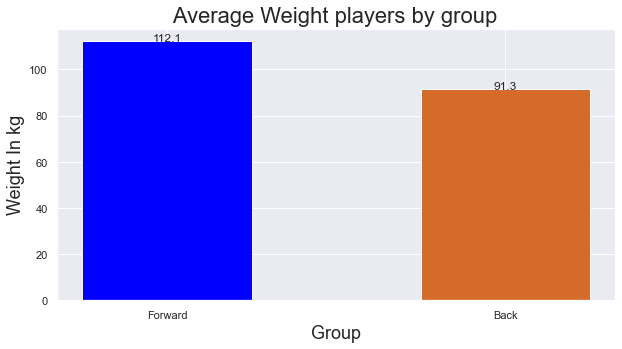

In [47]:
#get data
mFW = np.mean(df_clean['Weight In kg'][df_clean['Forward Or Back'] == 'Forward'])
mB = np.mean(df_clean['Weight In kg'][df_clean['Forward Or Back'] == 'Back'])
mFW = round(mFW,1)
mB = round(mB,1)


#plot        
m_dict = {'Forward':mFW, 'Back':mB}
groups = list(m_dict.keys())
values = list(m_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(groups, values, color=['blue', '#d46b29'],
        width = 0.5)
plt.xlabel("Group", size=18)
plt.ylabel("Weight In kg", size=18)
plt.title(" Average Weight players by group ", fontsize = 22)
addlabels(groups, values)
plt.show()

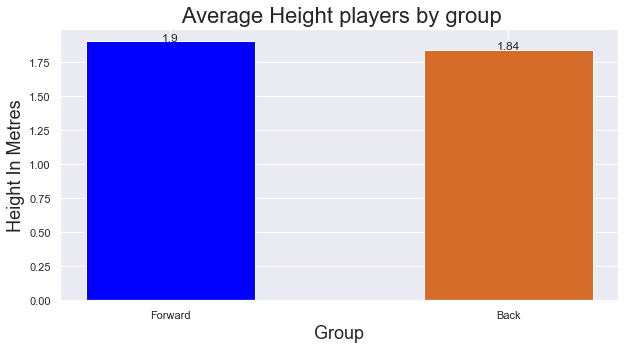

In [48]:
#get data
tFW = np.mean(df_clean['Height In Metres'][df_clean['Forward Or Back'] == 'Forward'])
tB = np.mean(df_clean['Height In Metres'][df_clean['Forward Or Back'] == 'Back'])
tFW = round(tFW,2)
tB = round(tB,2)

#Plot
t_dict = {'Forward':tFW, 'Back':tB}
groups = list(t_dict.keys())
values = list(t_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(groups, values, color=['blue', '#d46b29'],
        width = 0.5)
plt.xlabel("Group", size=18)
plt.ylabel("Height In Metres", size=18)
plt.title(" Average Height players by group" , fontsize = 22)
addlabels(groups, values)
plt.show()


Text(0.5, 1.0, 'Height and Weight players by group')

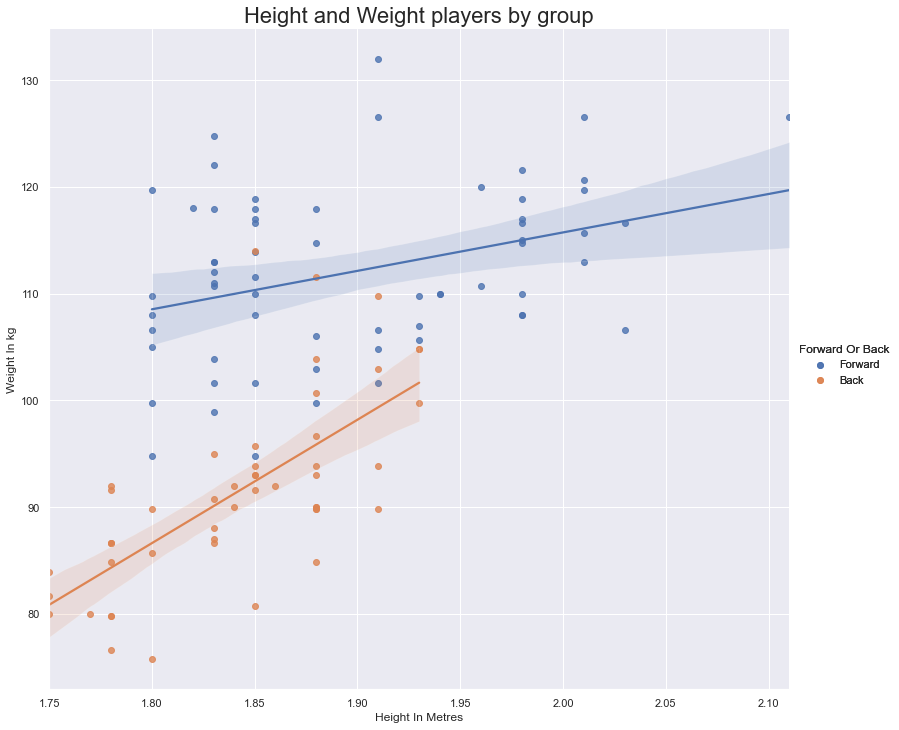

In [49]:
g = sns.lmplot(data = df_clean,x = 'Height In Metres', y = 'Weight In kg', hue = 'Forward Or Back', height = 10)
#g.map(plt.scatter, 'Height In Metres', 'Weight In kg')
g.add_legend()

plt.title('Height and Weight players by group', fontsize = 22)



### "Props" have the biggest BMI (ratio height/weight) on the field.

We have already created the BMI column.

Strating now and for the rest of the analysis, we will use the same positioning order on the field and in our visualisations :
'Prop', 'Hooker', 'Lock', 'Back-row', 'Scrum-half', 'Fly-half', 'Centre', 'Wing', 'Fullback'. 
if it is not clear for you please read the "Business pre-requisites" section.


Text(0.5, 1.0, 'Body Mass Index for each position')

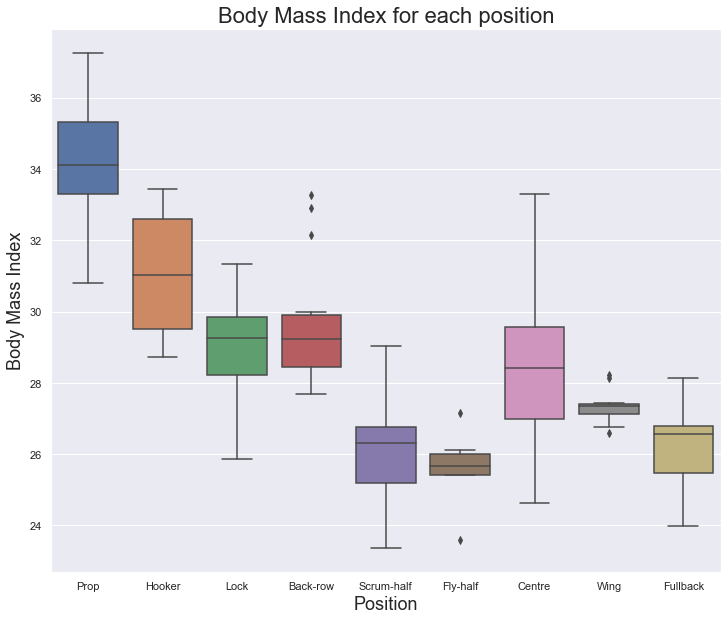

In [50]:
plt.figure(figsize=(12,10))
sns.boxplot(data = df_clean, x = 'Position', y = 'BMI', order = ['Prop', 'Hooker', 'Lock', 'Back-row', 'Scrum-half', 'Fly-half', 'Centre', 'Wing', 'Fullback'] ) 
plt.xlabel("Position", size=18)
plt.ylabel("Body Mass Index", size=18)
plt.title('Body Mass Index for each position', fontsize = 22)

### "Locks" are taller.

Text(0.5, 1.0, 'Body Mass Index for each position')

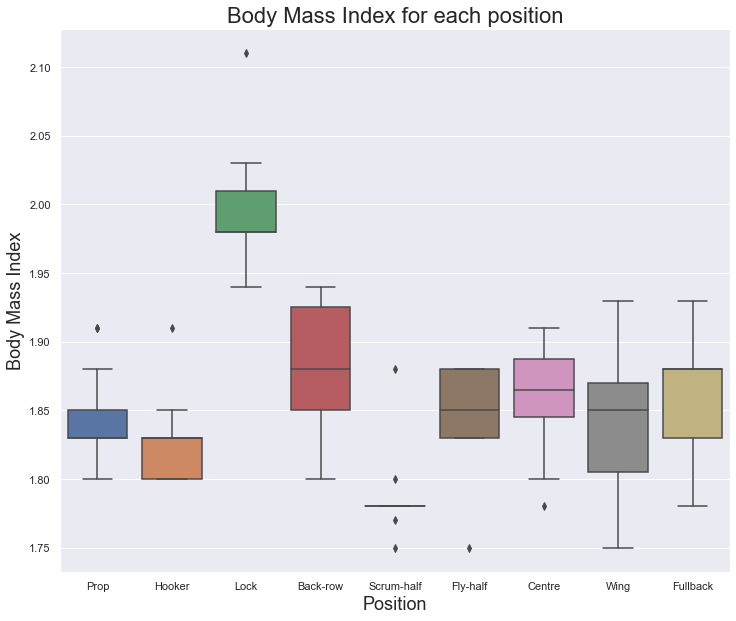

In [51]:
plt.figure(figsize=(12,10))
sns.boxplot(data = df_clean, x = 'Position', y = 'Height In Metres', order = ['Prop', 'Hooker', 'Lock', 'Back-row', 'Scrum-half', 'Fly-half', 'Centre', 'Wing', 'Fullback'] ) 
plt.xlabel("Position", size=18)
plt.ylabel("Body Mass Index", size=18)
plt.title('Body Mass Index for each position', fontsize = 22)

### "Forward" players tackle more than "Back" players.

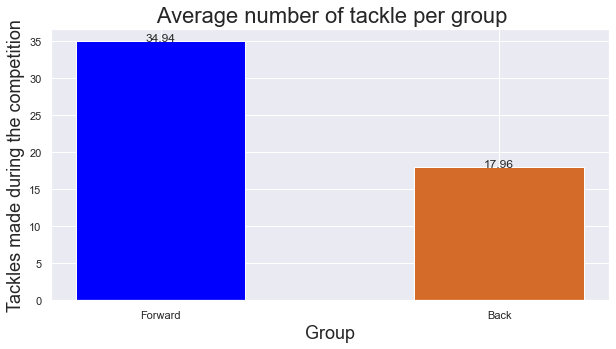

In [52]:
#get data
tFW = np.mean(df_clean['Tackles Made'][df_clean['Forward Or Back'] == 'Forward'])
tB = np.mean(df_clean['Tackles Made'][df_clean['Forward Or Back'] == 'Back'])
tFW = round(tFW,2)
tB = round(tB,2)

#Plot
t_dict = {'Forward':tFW, 'Back':tB}
groups = list(t_dict.keys())
values = list(t_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(groups, values, color=['blue', '#d46b29'],
        width = 0.5)
plt.xlabel("Group", size=18)
plt.ylabel("Tackles made during the competition", size=18)
plt.title(" Average number of tackle per group" , fontsize = 22)
addlabels(groups, values)
plt.show()

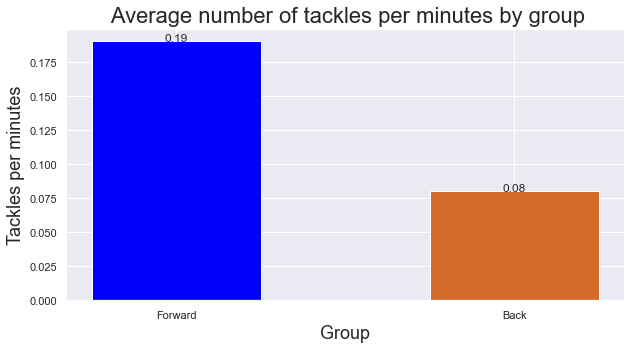

In [53]:
#get data
tFW = np.mean(df_clean['Tackles per min'][df_clean['Forward Or Back'] == 'Forward'])
tB = np.mean(df_clean['Tackles per min'][df_clean['Forward Or Back'] == 'Back'])
tFW = round(tFW,2)
tB = round(tB,2)

#Plot
t_dict = {'Forward':tFW, 'Back':tB}
groups = list(t_dict.keys())
values = list(t_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(groups, values, color=['blue', '#d46b29'],
        width = 0.5)
plt.xlabel("Group", size=18)
plt.ylabel("Tackles per minutes", size=18)
plt.title(" Average number of tackles per minutes by group" , fontsize = 22)
addlabels(groups, values)
plt.show()

### Back-rows are the best tacklers ?

Text(0.5, 1.0, 'Number of tackles per minutes by position')

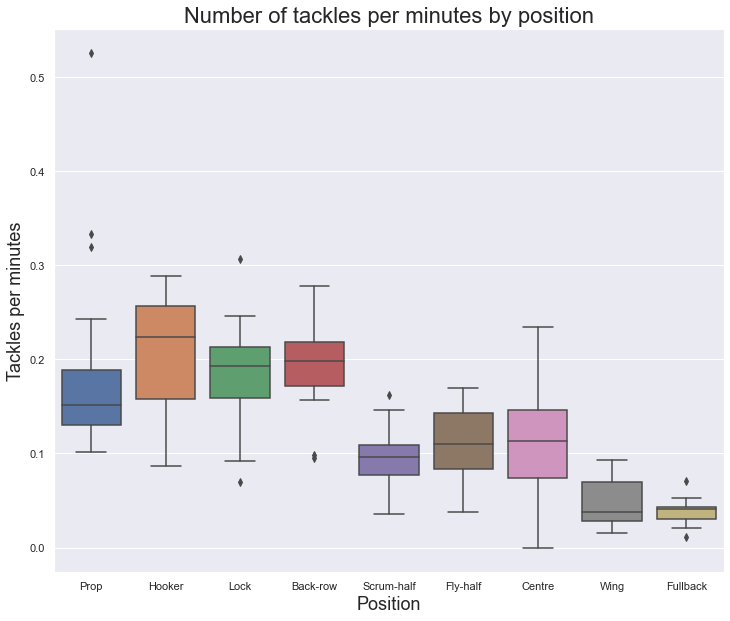

In [54]:
plt.figure(figsize=(12,10))
sns.boxplot(data = df_clean, x = 'Position', y = 'Tackles per min', order = ['Prop', 'Hooker', 'Lock', 'Back-row', 'Scrum-half', 'Fly-half', 'Centre', 'Wing', 'Fullback'] ) 
plt.xlabel("Position", size=18)
plt.ylabel("Tackles per minutes", size=18)
plt.title('Number of tackles per minutes by position', fontsize = 22)

In [55]:
#get the tackle beast
df_clean[ df_clean['Tackles per min'] > 0.4] 

,Player,Position,Forward Or Back,Height In Metres,Weight In kg,Age In Year,Minutes Played,Tackles Made,Tries Made,Kicks from hand made,Country,Tackles per min,Tries per min,Kicks per min,BMI
90,Harry Williams,Prop,Forward,1.91,132.0,"October 1, 1991",40,21.0,0.0,0.0,England,0.525,0.0,0.0,36.183219


### "Back" players score more tries than "Forward" players

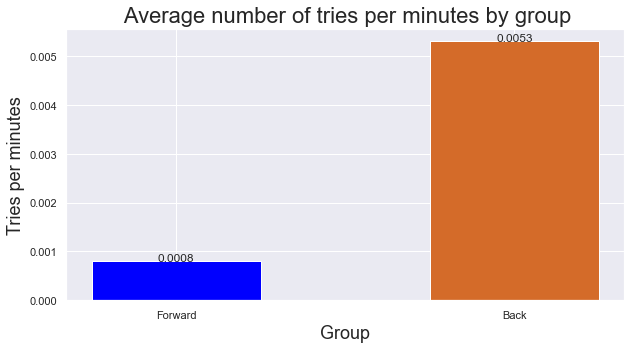

In [56]:
#get data
tFW = np.mean(df_clean['Tries per min'][df_clean['Forward Or Back'] == 'Forward'])
tB = np.mean(df_clean['Tries per min'][df_clean['Forward Or Back'] == 'Back'])
tFW = round(tFW,4)
tB = round(tB,4)

#Plot
t_dict = {'Forward':tFW, 'Back':tB}
groups = list(t_dict.keys())
values = list(t_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(groups, values, color=['blue', '#d46b29'],
        width = 0.5)
plt.xlabel("Group", size=18)
plt.ylabel("Tries per minutes", size=18)
plt.title(" Average number of tries per minutes by group" , fontsize = 22)
addlabels(groups, values)
plt.show()

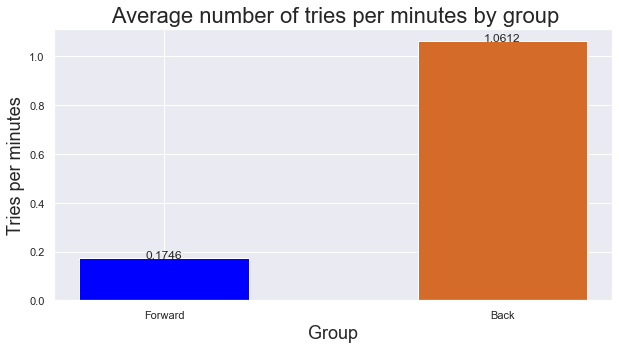

In [57]:
#get data
tFW = np.mean(df_clean['Tries Made'][df_clean['Forward Or Back'] == 'Forward'])
tB = np.mean(df_clean['Tries Made'][df_clean['Forward Or Back'] == 'Back'])
tFW = round(tFW,4)
tB = round(tB,4)

#Plot
t_dict = {'Forward':tFW, 'Back':tB}
groups = list(t_dict.keys())
values = list(t_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(groups, values, color=['blue', '#d46b29'],
        width = 0.5)
plt.xlabel("Group", size=18)
plt.ylabel("Tries per minutes", size=18)
plt.title(" Average number of tries per minutes by group" , fontsize = 22)
addlabels(groups, values)
plt.show()

Text(0.5, 1.0, 'Tries per min by position')

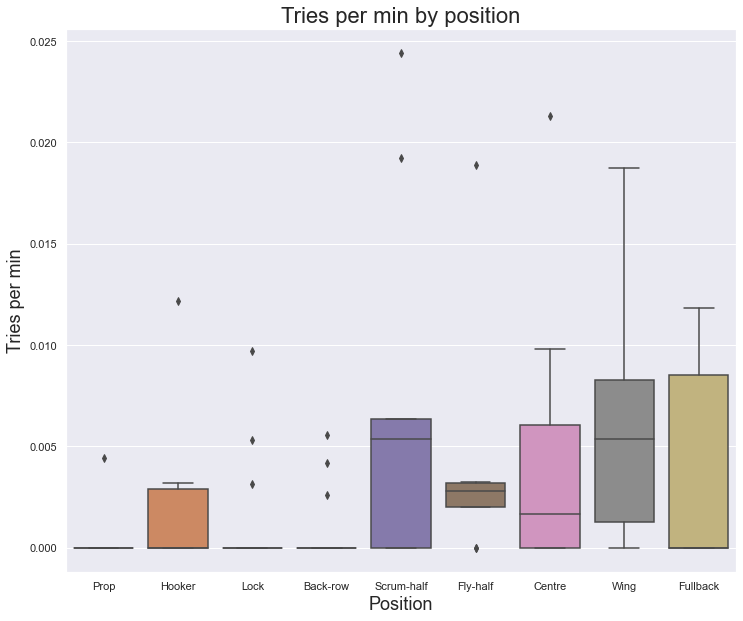

In [58]:
plt.figure(figsize=(12,10))
sns.boxplot(data = df_clean, x = 'Position', y = 'Tries per min', order = ['Prop', 'Hooker', 'Lock', 'Back-row', 'Scrum-half', 'Fly-half', 'Centre', 'Wing', 'Fullback'] ) 
plt.xlabel("Position", size=18)
plt.ylabel("Tries per min", size=18)
plt.title('Tries per min by position', fontsize = 22)

Here, the boxplot are not sufficient to understand. We can see there is only 40 tries score during the tournament. On 122 players, we get to many player with a ratio of 0 and it is polluting the visualisation :

In [59]:
#get the number of player who scored
df_clean[ df_clean['Tries Made'] != 0].count()['Player'] 

40

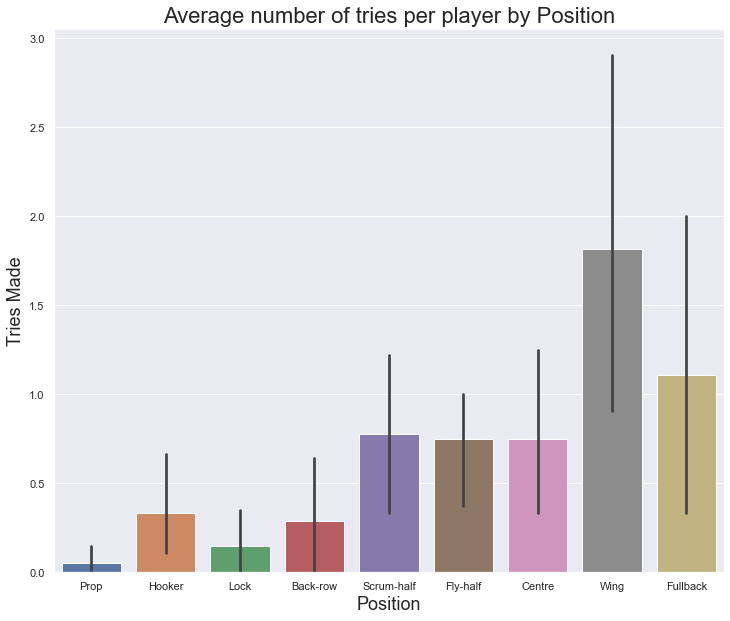

In [60]:
plt.figure(figsize=(12,10))
plt.xlabel("Position", size=18)
plt.ylabel("Tries per min", size=18)
plt.title('Average number of tries per player by Position', fontsize = 22)
bx = sns.barplot(x="Position", y="Tries Made", data=df_clean, order = ['Prop', 'Hooker', 'Lock', 'Back-row', 'Scrum-half', 'Fly-half', 'Centre', 'Wing', 'Fullback'])

### Back" players use more their feet than "Forward" players


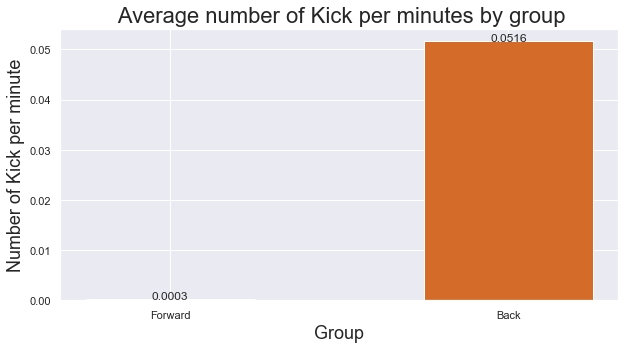

In [61]:
#get data
tFW = np.mean(df_clean['Kicks per min'][df_clean['Forward Or Back'] == 'Forward'])
tB = np.mean(df_clean['Kicks per min'][df_clean['Forward Or Back'] == 'Back'])
tFW = round(tFW,4)
tB = round(tB,4)

#Plot
t_dict = {'Forward':tFW, 'Back':tB}
groups = list(t_dict.keys())
values = list(t_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(groups, values, color=['blue', '#d46b29'],
        width = 0.5)
plt.xlabel("Group", size=18)
plt.ylabel("Number of Kick per minute", size=18)
plt.title(" Average number of Kick per minutes by group" , fontsize = 22)
addlabels(groups, values)
plt.show()

In [62]:
516/3

172.0

### Fly-half" is the position where we kick more

Text(0.5, 1.0, 'Kicks per minutes by position - Back only')

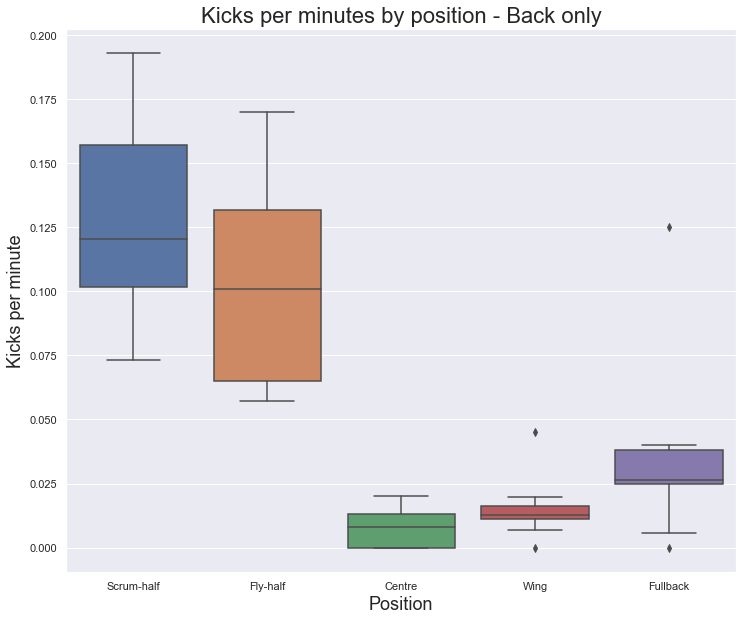

In [63]:
plt.figure(figsize=(12,10))
sns.boxplot(data = df_clean, x = 'Position', y = 'Kicks per min', order = ['Scrum-half', 'Fly-half', 'Centre', 'Wing', 'Fullback'] ) 
plt.xlabel("Position", size=18)
plt.ylabel("Kicks per minute", size=18)
plt.title('Kicks per minutes by position - Back only', fontsize = 22)

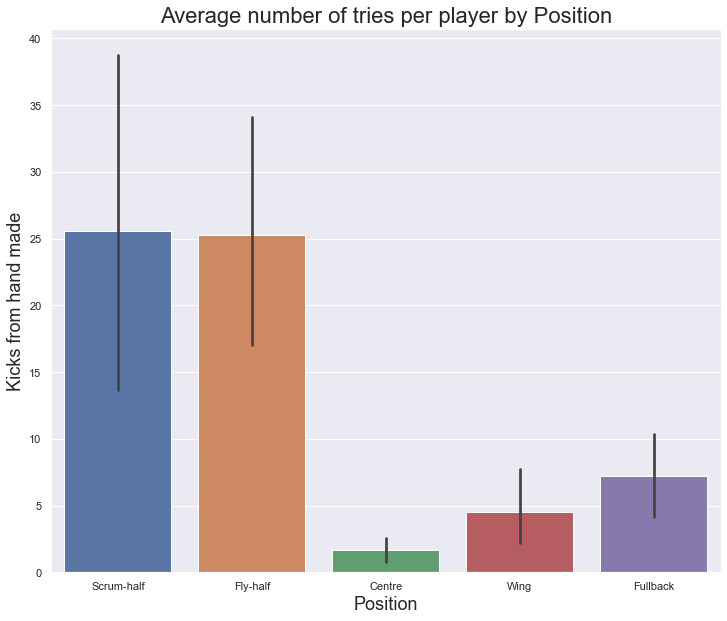

In [64]:
plt.figure(figsize=(12,10))
plt.xlabel("Position", size=18)
plt.ylabel("Kicks per min", size=18)
plt.title('Average number of tries per player by Position', fontsize = 22)
bx = sns.barplot(x="Position", y="Kicks from hand made", data=df_clean, order = ['Scrum-half', 'Fly-half', 'Centre', 'Wing', 'Fullback'])

# Conlusions

On 8 stereotypes, we have validated with our data analysis 6 of them. And without a lot of opposition. It seem that the rugby game despite of this recent evolution have still keep some of this specialties : The physical differences, the forward players who hurt their opponent, the wingers score !

Even if Back-rows are not the best tacklers they are second and closed to the leader the Hooker.

Our only surprised is coming from the kicking aspect where the Fly-half is not the leader anymore. Now the fly-half share this responsibility with the scrum-half.

# Resources

https://www.kaggle.com/cianmcgovernleahy/six-nations-historical-data/version/1

https://datascienceparichay.com/article/insert-image-in-a-jupyter-notebook/

https://www.geeksforgeeks.org/convert-birth-date-to-age-in-pandas/

https://blog.knoldus.com/how-to-find-correlation-value-of-categorical-variables/

https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=bar#seaborn.barplot

https://stackoverflow.com/questions/22635110/sorting-the-order-of-bars-in-pandas-matplotlib-bar-plots


